In [13]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import mysql.connector

db=mysql.connector.connect(
host='localhost',
user='root',
password='narayan1998',
database='pizzahut'
    )

cur = db.cursor()

#  Retrieve the total number of orders placed.

In [57]:
query="""select count(order_id)
from orders"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Total Number of Order"])
df.head()

,Total Number of Order
0,21350


#  Calculate the total revenue generated from pizza sales.

In [24]:
query = """select  round(sum(od.quantity*p.price ),2) as Total_revenue
from order_details od 
join pizzas p on od.pizza_id = p.pizza_id"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data,columns =["Revenue"])
df

,Revenue
0,817860.05


#  Identify the highest-priced pizza.

In [56]:
query ="""select pt.name as Pizzas_Name,(p.price) as Highest_Price
from pizzas p
join pizza_types pt on p.pizza_type_id = pt.pizza_type_id
order by price desc
limit 1 """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Pizzas Name","Highest Price"])
df.head()

,Pizzas Name,Highest Price
0,The Greek Pizza,35.95


#  Identify the most common pizza size ordered.

In [55]:
query = """SELECT p.size, COUNT(od.order_details_id) AS count_order
FROM pizzas p
JOIN order_details od ON p.pizza_id = od.pizza_id
group by size
ORDER BY count_order DESC
LIMIT 1 """

cur.execute (query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Pizza Size","Count Order"])
df.head()

,Pizza Size,Count Order
0,L,18526


#  List the top 5 most ordered pizza types along with their quantities.

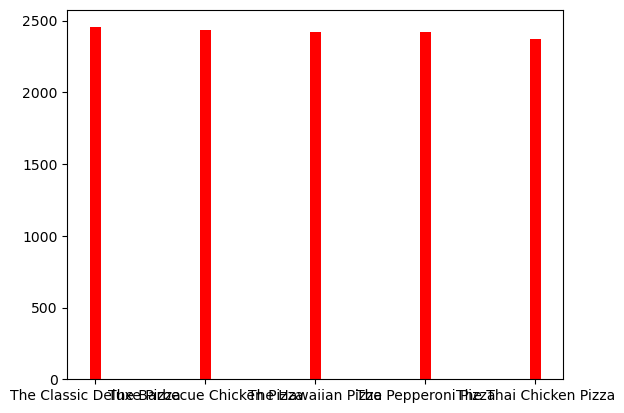

In [65]:
query ="""SELECT sum(od.quantity) as quantity ,pt.name as Name
from pizza_types pt
join pizzas on pt.pizza_type_id = pizzas.pizza_type_id
join order_details od on od.pizza_id = pizzas.pizza_id
group by Name 
order by quantity desc
limit 5"""

cur.execute (query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Quantity","Pizzas Name"])
#df.head()

x = np.array(["The Classic Deluxe Pizza", "The Barbecue Chicken Pizza", "The Hawaiian Pizza", "The Pepperoni Pizza","The Thai Chicken Pizza"])
y = np.array([2453, 2432,2422, 2418,2371])

plt.bar(x,y, width=0.1, color="red")
plt.show()



#  Join the necessary tables to find the total quantity of each pizza category ordered.

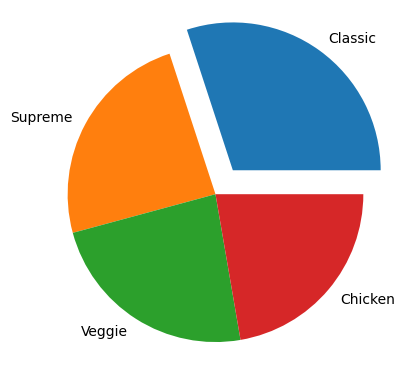

In [67]:
query ="""SELECT pt.category as category, sum(od.quantity) as quantity 
from pizza_types pt
join pizzas on pt.pizza_type_id = pizzas.pizza_type_id
join order_details od on od.pizza_id = pizzas.pizza_id
group by category
order by quantity desc"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Category","Quantity"])
#df.head()

y = np.array([14888, 11987, 11649, 11050])
mylabels = ["Classic","Supreme","Veggie","Chicken"]
myexplode = [0.2, 0, 0, 0]
plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 



#  Determine the distribution of orders by hour of the day.

In [41]:
query ="""select hour(order_time) as Distribution ,count(order_id)as per_day
from orders
group by hour(order_time)
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Distribution","Per Day"])
df.head(15)



,Distribution,Per Day
0,11,1231
1,12,2520
2,13,2455
3,14,1472
4,15,1468
5,16,1920
6,17,2336
7,18,2399
8,19,2009
9,20,1642


#  Join relevant tables to find the category-wise distribution of pizzas.

In [59]:
query ="""select pt.category ,count( pt.name) as pizza_types
from pizza_types pt
group by pt.category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Category","Pizza_Types"])
df.head()

,Category,Pizza_Types
0,Chicken,6
1,Classic,8
2,Supreme,9
3,Veggie,9


#  Group the orders by date and calculate the average number of pizzas ordered per day.

In [60]:
query ="""select round(avg(quantity),0)as Avreage_pizza_order_per_day from 
(select orders.order_date,sum(order_details.quantity) as quantity
from orders left join order_details 
on orders.order_id = order_details.order_id
group by orders.order_date) As order_quantity """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Avreage_pizza_order_per_day"])
df.head()

,Avreage_pizza_order_per_day
0,138


#  Determine the top 3 most ordered pizza types based on revenue.

In [61]:
query="""Select pizza_types.name , sum(order_details.quantity*pizzas.price) as revenue 
from pizza_types join pizzas 
on pizza_types.pizza_type_id = pizzas.pizza_type_id
join order_details on pizzas.pizza_id=order_details.pizza_id
group by pizza_types.name
order by revenue desc
limit 3"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Pizza Name ","Revenue"])
df.head()


,Pizza Name,Revenue
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50


#  Calculate the percentage contribution of each pizza type to total revenue.

In [62]:
query="""select pt.category,round((sum(od.quantity*p.price)/(select  round(sum(od.quantity*p.price ),2) as Total_revenue 
from order_details od 
join pizzas p on od.pizza_id = p.pizza_id))*100,2) as contribution
from order_details od join pizzas p on od.pizza_id = p.pizza_id
join pizza_types pt on pt.pizza_type_id = p.pizza_type_id
group by category
order by contribution desc"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Category ","Contribution"])
df.head()


,Category,Contribution
0,Classic,26.91
1,Supreme,25.46
2,Chicken,23.96
3,Veggie,23.68


#  Analyze the cumulative revenue generated over time.

In [51]:
query="""select order_date, sum(revenue)over(order by Order_date) as cum_quantity from 
(Select orders.Order_date,sum(order_details.quantity*pizzas.price) as revenue
from order_details
join orders  on order_details.order_id = orders.Order_id
join pizzas on order_details.pizza_id = pizzas.pizza_id
group by orders.order_date) as sales"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Order Date","Cum_Quantity"])
df.head(6)
df.tail(6)

,Order Date,Cum_Quantity
352,2015-12-26,809196.80
353,2015-12-27,810615.80
354,2015-12-28,812253.00
355,2015-12-29,813606.25
356,2015-12-30,814944.05
357,2015-12-31,817860.05


#  Determine the top 3 most ordered pizza types based on revenue for each pizza category.

In [48]:
query="""select category,name , revenue,rank() over(partition by category order by revenue desc )as top3 from 
(select pizza_types.category , sum(order_details.quantity*pizzas.price) as revenue,pizza_types.name
from pizza_types
join pizzas on pizza_types.pizza_type_id = pizzas.pizza_type_id
join order_details on pizzas.pizza_id = order_details.pizza_id
group by pizza_types.category,pizza_types.name) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns =["Category","Pizza Name","Revenue","Top 3"])
df.head(4)

,Category,Pizza Name,Revenue,Top 3
0,Chicken,The Thai Chicken Pizza,43434.25,1
1,Chicken,The Barbecue Chicken Pizza,42768.00,2
2,Chicken,The California Chicken Pizza,41409.50,3
3,Chicken,The Southwest Chicken Pizza,34705.75,4
